In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline 
import os
import re
os.chdir("./Desktop/ArticleClassifier")

# Changing the kernels being used and the c values

# Preprocessing the Data

In [2]:
# Run through 70% of the text files from each category (folder)
# 70% Training, 30% Testing for each category
#Creates training_titles and testing_tiles
training_titles_files = []
testing_titles_files = [] 

business_files = os.listdir("./business")
train_business = business_files[0:358]
test_business = business_files[358:] # length = 152, TOTAL = 510 
training_titles_files.append(train_business)
testing_titles_files.append(test_business)

entertainment_files = os.listdir("./entertainment")
train_entertainment = entertainment_files[0:270]
test_entertainment = entertainment_files[270:] # 116, TOTAL = 386
training_titles_files.append(train_entertainment)
testing_titles_files.append(test_entertainment)

politics_files = os.listdir("./politics")
train_politics = politics_files[0:293]
test_politics = politics_files[293:] # 124, TOTAL = 417
training_titles_files.append(train_politics)
testing_titles_files.append(test_politics)

sport_files = os.listdir("./sport")
train_sport = sport_files[0:359]
test_sport = sport_files[359:] # 152, TOTAL = 511
training_titles_files.append(train_sport)
testing_titles_files.append(test_sport)

tech_files = os.listdir("./tech")
train_tech = tech_files[0:281]
test_tech = tech_files[281:] # 120, TOTAL = 401
training_titles_files.append(train_tech)
testing_titles_files.append(test_tech)

In [3]:
training_text_file = open("trainingTextFile.txt", "w")

classes = 1
for i in training_titles_files:
	folder_name = ""
	if (classes == 1): 
		folder_name = "business"
	elif (classes == 2):
		folder_name = "entertainment"
	elif (classes == 3):
		folder_name = "politics"
	elif (classes == 4):
		folder_name = "sport"
	elif (classes == 5):
		folder_name = "tech"
	for file_name in i:
		file = "./" + folder_name + "/" + file_name
		#print(file)
		opened = open(file, "r")
		training_text_file.write(opened.readline())
		opened.close()
	classes = classes + 1

training_text_file.close()

masterTestDataFile = open("testTextFile.txt", "w")

classes = 1
for i in testing_titles_files:
	folder_name = ""
	if (classes == 1): 
		folder_name = "business"
	elif (classes == 2):
		folder_name = "entertainment"
	elif (classes == 3):
		folder_name = "politics"
	elif (classes == 4):
		folder_name = "sport"
	elif (classes == 5):
		folder_name = "tech"
	for file_name in i:
		file = "./" + folder_name + "/" + file_name
		#print (file)
		opened = open(file, "r")
		lineRead = opened.readline()
		#try: 
		masterTestDataFile.write(lineRead)
		#except UnicodeDecodeError:
		opened.close()
	classes = classes + 1

masterTestDataFile.close()

#currency stemming nlp

In [4]:
training = []
testing = []

# Puts words in dictionary, key = word, value = index
trfile = open("trainingTextFile.txt", "r")

for line in trfile:
	line = line.replace("'", "")
	new_line = line.split()
	for i in new_line:
		training.append(i)

trfile.close()

words = {}
count = 0
for i in training:
	if i not in words:
		words[i] = count
		count = count + 1

In [5]:
#Create Training Data Matrix
d = len(words) # Number of features (unique words) we have in the dictionary
# print(d)
train_x = []

trfile = open("trainingTextFile.txt", "r")

for line in trfile:
	line = line.replace("'", "")
	word = line.split()
	arr = [0] * d
	for i in word:
		index = words[i]
		arr[index] = arr[index] + 1
	train_x.append(arr)
trfile.close()

In [6]:
#Target Training Vector
train_y = np.zeros((1561, 1))
for i in range(0, 1561):
    if i >=0 and i < 358:
        train_y[i] = 1
    elif i >= 358 and i < 628:
        train_y[i] = 2
    elif i >= 628 and i < 921:
        train_y[i] = 3
    elif i >= 921 and i < 1280:
        train_y[i] = 4
    elif i >= 1280 and i < 1561:
        train_y[i] = 5

In [7]:
#Create Testing Data Matrix
test_x = []

testfile = open("testTextFile.txt", "r")

for line in testfile:
	line = line.replace("'", "")
	word = line.split()
	arr = [0] * d
	for i in word:
		if i in words:
			index = words[i]
			arr[index] = arr[index] + 1
	test_x.append(arr)

testfile.close()

In [8]:
#Target Test Vector
test_y = np.zeros((664, 1))
for i in range(0, 664):
    if i >= 0 and i < 152:
        test_y[i] = 1
    elif i >= 152 and i < 268:
        test_y[i] = 2
    elif i >= 268 and i < 392:
        test_y[i] = 3
    elif i >= 392 and i < 544:
        test_y[i] = 4
    elif i >= 544 and i < 664:
        test_y[i] = 5
    else:
        test_y[i] = 1

# countzero = 0
# countone = 0
# counttwo = 0
# countthree = 0
# countfour = 0
# for i in test_y:
# 	if i == 0:
# 		countzero+=1
# 	if i == 1:
# 		countone += 1
# 	if i == 2:
# 		counttwo+=1 
# 	if i == 3:
# 		countthree+=1
# 	if i == 4:
# 		countfour +=1

#print(countzero)
#print(countone)
#print(counttwo)
#print(countthree)
#print(countfour)


# y = 0 --> Business
# y = 1 --> Entertainment
# y = 2 --> Politics
# y = 3 --> Sport
# y = 4 --> Tech

# print(test_y.shape)

In [9]:
#Training for each classification
train_y_1 = train_y.copy()
train_y_2 = train_y.copy()
train_y_3 = train_y.copy()
train_y_4 = train_y.copy()
train_y_5 = train_y.copy()

# Changing the values that aren't the classified values to 0
train_y_1[train_y_1 != 1] = 0
train_y_2[train_y_2 != 2] = 0
train_y_3[train_y_3 != 3] = 0
train_y_4[train_y_4 != 4] = 0
train_y_5[train_y_5 != 5] = 0

# Changes the correct classification values to 1 so it's easier
train_y_2[train_y_2 == 2] = 1
train_y_3[train_y_3 == 3] = 1
train_y_4[train_y_4 == 4] = 1
train_y_5[train_y_5 == 5] = 1

train_y_1_arr = []
train_y_2_arr = []
train_y_3_arr = []
train_y_4_arr = []
train_y_5_arr = []

for i in range(0, 1561):
    train_y_1_arr.insert(i, int(train_y_1[i][0]))
    train_y_2_arr.insert(i, int(train_y_2[i][0]))
    train_y_3_arr.insert(i, int(train_y_3[i][0]))
    train_y_4_arr.insert(i, int(train_y_4[i][0]))
    train_y_5_arr.insert(i, int(train_y_5[i][0]))

In [10]:
#Test for each classification
test_y_1 = test_y.copy()
test_y_2 = test_y.copy()
test_y_3 = test_y.copy()
test_y_4 = test_y.copy()
test_y_5 = test_y.copy()

# Changing the values that aren't the classified values to 0
test_y_1[test_y_1 != 1] = 0
test_y_2[test_y_2 != 2] = 0
test_y_3[test_y_3 != 3] = 0
test_y_4[test_y_4 != 4] = 0
test_y_5[test_y_5 != 5] = 0

# Changes the correct classification values to 1 so it's easier
test_y_2[test_y_2 == 2] = 1
test_y_3[test_y_3 == 3] = 1
test_y_4[test_y_4 == 4] = 1
test_y_5[test_y_5 == 5] = 1

test_y_1_arr = []
test_y_2_arr = []
test_y_3_arr = []
test_y_4_arr = []
test_y_5_arr = []

for i in range(0, 664):
    test_y_1_arr.insert(i, int(test_y_1[i][0]))
    test_y_2_arr.insert(i, int(test_y_2[i][0]))
    test_y_3_arr.insert(i, int(test_y_3[i][0]))
    test_y_4_arr.insert(i, int(test_y_4[i][0]))
    test_y_5_arr.insert(i, int(test_y_5[i][0]))

# Regularization L1

In [11]:
prob = []
def logreg_model(c , X_train, Y_train, X_test, Y_test):
    logreg = linear_model.LogisticRegression(C=c,penalty='l1', warm_start=True, solver='saga')
    logreg.fit(X_train, Y_train)
    Yhat_train = logreg.predict(X_train)
    Yhat_test = logreg.predict(X_test)
    prob.append(logreg.predict_proba(X_test))

In [12]:
#Testing Accuracy
c = 1
logreg_model(c, train_x, train_y_1_arr, test_x, test_y_1_arr)
logreg_model(c, train_x, train_y_2_arr, test_x, test_y_2_arr)
logreg_model(c, train_x, train_y_3_arr, test_x, test_y_3_arr)
logreg_model(c, train_x, train_y_4_arr, test_x, test_y_4_arr)
logreg_model(c, train_x, train_y_5_arr, test_x, test_y_5_arr)

test_yhat_L1 = []
# test_yhat_L1_pac = []
for i in range (0, len(test_x), 1):
    values = []
    probability_and_classification = []
    m1 = prob[0][i][1]
    m2 = prob[1][i][1]
    m3 = prob[2][i][1]
    m4 = prob[3][i][1]
    m5 = prob[4][i][1]
    values.append(m1)
    values.append(m2)
    values.append(m3)
    values.append(m4)
    values.append(m5)
    #max_prob = max(m1, m2, m3, m4, m5)
    
#     probability_and_classification.append(max(values))
#     probability_and_classification.append((values.index(max(values))) + 1)
#     test_yhat_L1_pac.append(probability_and_classification)
    
    test_yhat_L1.append((values.index(max(values))) + 1)
print(test_yhat_L1) # Correct

#Calculate testing accuracy
correct = 0
incorrect = 0
for i in range (0, len(test_x)):
    if (test_yhat_L1[i] == test_y[i]):
        correct+= 1
#         print(test_yhat_L1[i], ", actual: ", test_y[i][0], "=", (test_y[i][0]))
    else:
        incorrect += 1
#         print("INCORRECT", test_yhat_L1[i], ", actual: ", test_y[i][0], "=", (test_y[i][0]))

test_acc_L1 = correct/len(test_x)
print(test_acc_L1, "is the testing accuracy for our logistic regression with L1 regularization")

/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarni

[4, 1, 1, 4, 5, 4, 1, 4, 1, 1, 5, 4, 1, 1, 1, 1, 1, 1, 3, 4, 3, 1, 3, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 5, 3, 4, 1, 1, 1, 3, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 5, 1, 1, 4, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 5, 3, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 3, 4, 4, 1, 4, 4, 1, 5, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 3, 1, 1, 1, 1, 1, 4, 1, 4, 4, 3, 3, 1, 1, 1, 1, 1, 1, 3, 4, 1, 1, 4, 1, 1, 5, 4, 2, 5, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 1, 3, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 4, 1, 3, 1, 2, 2, 2, 4, 2, 2, 3, 5, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 4, 4, 2, 1, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 1, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 4, 2, 4, 4, 4, 2, 3, 3, 4, 3, 3, 3, 2, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 2, 1, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 4, 2, 3, 4, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 5, 3, 3, 4, 5, 4, 4, 3, 

In [13]:
#training accuracy
c = 1
prob = []
logreg_model(c, train_x, train_y_1_arr, train_x, train_y)
logreg_model(c, train_x, train_y_2_arr, train_x, train_y)
logreg_model(c, train_x, train_y_3_arr, train_x, train_y)
logreg_model(c, train_x, train_y_4_arr, train_x, train_y)
logreg_model(c, train_x, train_y_5_arr, train_x, train_y)

train_yhat_L1 = []
for i in range (0, len(train_x), 1):
    values = []
    probability_and_classification = []
    m1 = prob[0][i][1]
    m2 = prob[1][i][1]
    m3 = prob[2][i][1]
    m4 = prob[3][i][1]
    m5 = prob[4][i][1]
    values.append(m1)
    values.append(m2)
    values.append(m3)
    values.append(m4)
    values.append(m5)
    
    train_yhat_L1.append((values.index(max(values))) + 1)
print(train_yhat_L1) # Correct

correct = 0
incorrect = 0
for i in range (0, len(train_x)):
    if (train_yhat_L1[i] == train_y[i]):
        correct+= 1
#         print(train_yhat_L1[i], ", actual: ", train_y[i][0], "=", (train_y[i][0]))
    else:
        incorrect += 1
#         print("INCORRECT", train_yhat_L1[i], ", actual: ", train_y[i][0], "=", (train_y[i][0]))

train_acc_L1 = correct/len(train_x)
print(train_acc_L1, "is the training accuracy for our logistic regression with L1 regularization")

/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarni

[1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 4, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 5, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 

# Regularization L2

In [17]:
def logreg2_model(c , X_train, Y_train, X_test, Y_test):
    logreg2 = linear_model.LogisticRegression(C=c, warm_start=True)
    logreg2.fit(X_train, Y_train) 
    Yhat_train = logreg2.predict(X_train)
    Yhat_test = logreg2.predict(X_test)
    prob.append(logreg2.predict_proba(X_test))

In [18]:
#Testing Accuracy
prob = []
c = 1
logreg2_model(c, train_x, train_y_1_arr, test_x, test_y_1_arr)
logreg2_model(c, train_x, train_y_2_arr, test_x, test_y_2_arr)
logreg2_model(c, train_x, train_y_3_arr, test_x, test_y_3_arr)
logreg2_model(c, train_x, train_y_4_arr, test_x, test_y_4_arr)
logreg2_model(c, train_x, train_y_5_arr, test_x, test_y_5_arr)

test_yhat_L2 = []
# test_yhat_L2_pac = []
for i in range (0, len(test_x), 1):
    values = []
    probability_and_classification = []
    m1 = prob[0][i][1]
    m2 = prob[1][i][1]
    m3 = prob[2][i][1]
    m4 = prob[3][i][1]
    m5 = prob[4][i][1]
    values.append(m1)
    values.append(m2)
    values.append(m3)
    values.append(m4)
    values.append(m5)
    #max_prob = max(m1, m2, m3, m4, m5)
    
#     probability_and_classification.append(max(values))
#     probability_and_classification.append((values.index(max(values))) + 1)
#     test_yhat_L2_pac.append(probability_and_classification)
    
    test_yhat_L2.append((values.index(max(values))) + 1)
print(test_yhat_L2) # Correct

#Calculate testing accuracy
correct = 0
incorrect = 0
for i in range (0, len(test_x)):
    if (test_yhat_L2[i] == test_y[i]):
        correct+= 1
#         print(test_yhat_L2[i], ", actual: ", test_y[i][0], "=", (test_y[i][0]))
    else:
        incorrect += 1
#         print("INCORRECT", test_yhat_L2[i], ", actual: ", test_y[i][0], "=", (test_y[i][0]))

test_acc_L2 = correct/len(test_x)
print(test_acc_L2, "is the testing accuracy for our logistic regression with L2 regularization")

/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

[4, 1, 1, 1, 5, 3, 1, 4, 1, 1, 5, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 5, 1, 4, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 3, 1, 4, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 3, 4, 4, 1, 1, 1, 1, 5, 1, 4, 1, 1, 1, 1, 1, 3, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 5, 1, 1, 1, 1, 1, 1, 3, 4, 1, 1, 4, 1, 1, 5, 4, 2, 4, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 1, 4, 4, 2, 2, 2, 2, 1, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 4, 1, 3, 1, 2, 2, 2, 4, 2, 2, 3, 5, 2, 2, 2, 2, 2, 2, 2, 4, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 4, 2, 5, 2, 3, 2, 4, 2, 2, 1, 2, 2, 4, 3, 2, 2, 2, 2, 1, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 3, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 3, 3, 5, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 5, 3, 5, 3, 

In [19]:
#training accuracy
c = 1
prob = []
logreg2_model(c, train_x, train_y_1_arr, train_x, train_y)
logreg2_model(c, train_x, train_y_2_arr, train_x, train_y)
logreg2_model(c, train_x, train_y_3_arr, train_x, train_y)
logreg2_model(c, train_x, train_y_4_arr, train_x, train_y)
logreg2_model(c, train_x, train_y_5_arr, train_x, train_y)

train_yhat_L2 = []
for i in range (0, len(train_x), 1):
    values = []
    probability_and_classification = []
    m1 = prob[0][i][1]
    m2 = prob[1][i][1]
    m3 = prob[2][i][1]
    m4 = prob[3][i][1]
    m5 = prob[4][i][1]
    values.append(m1)
    values.append(m2)
    values.append(m3)
    values.append(m4)
    values.append(m5)
    
    train_yhat_L2.append((values.index(max(values))) + 1)
print(train_yhat_L2) # Correct

correct = 0
incorrect = 0
for i in range (0, len(train_x)):
    if (train_yhat_L2[i] == train_y[i]):
        correct+= 1
#         print(train_yhat_L2[i], ", actual: ", train_y[i][0], "=", (train_y[i][0]))
    else:
        incorrect += 1
#         print("INCORRECT", train_yhat_L2[i], ", actual: ", train_y[i][0], "=", (train_y[i][0]))

train_acc_L2 = correct/len(train_x)
print(train_acc_L2, "is the training accuracy for our logistic regression with L2 regularization")

/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# Variation in C

In [23]:
#change logreg2_model to best regulariazation above
c_vals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
train_acc_carray = []
test_acc_carray = []
for c in c_vals:
    #testing
    prob = []
    logreg2_model(c, train_x, train_y_1_arr, test_x, test_y_1_arr)
    logreg2_model(c, train_x, train_y_2_arr, test_x, test_y_2_arr)
    logreg2_model(c, train_x, train_y_3_arr, test_x, test_y_3_arr)
    logreg2_model(c, train_x, train_y_4_arr, test_x, test_y_4_arr)
    logreg2_model(c, train_x, train_y_5_arr, test_x, test_y_5_arr)
    
    test_yhat_linear = []
    # test_yhat_linear_pac = []
    for i in range (0, len(test_x), 1):
        values = []
        probability_and_classification = []
        m1 = prob[0][i][1]
        m2 = prob[1][i][1]
        m3 = prob[2][i][1]
        m4 = prob[3][i][1]
        m5 = prob[4][i][1]
        values.append(m1)
        values.append(m2)
        values.append(m3)
        values.append(m4)
        values.append(m5)
        #max_prob = max(m1, m2, m3, m4, m5)

    #     probability_and_classification.append(max(values))
    #     probability_and_classification.append((values.index(max(values))) + 1)
    #     test_yhat_linear_pac.append(probability_and_classification)

        test_yhat_linear.append((values.index(max(values))) + 1)
    # print(test_yhat_linear) # Correct
    
    #Calculate testing accuracy
    correct = 0
    incorrect = 0
    for i in range (0, 664):
        if (test_yhat_linear[i] == test_y[i]):
            correct+= 1
    #         print(test_yhat_linear[i], ", actual: ", test_y[i][0], "=", (test_y[i][0]))
        else:
            incorrect += 1
    #         print("INCORRECT", test_yhat_linear[i], ", actual: ", test_y[i][0], "=", (test_y[i][0]))

    test_acc_linear = correct/len(test_x)
    print(test_acc_linear, "is the testing accuracy for logistic regression with regularization L2 and c =" , c)
    test_acc_carray.append(test_acc_linear)
    
    
    #training accuracy
    prob = []
    logreg2_model(c, train_x, train_y_1_arr, train_x, train_y)
    logreg2_model(c, train_x, train_y_2_arr, train_x, train_y)
    logreg2_model(c, train_x, train_y_3_arr, train_x, train_y)
    logreg2_model(c, train_x, train_y_4_arr, train_x, train_y)
    logreg2_model(c, train_x, train_y_5_arr, train_x, train_y)

    train_yhat_linear = []
    for i in range (0, len(train_x), 1):
        values = []
        probability_and_classification = []
        m1 = prob[0][i][1]
        m2 = prob[1][i][1]
        m3 = prob[2][i][1]
        m4 = prob[3][i][1]
        m5 = prob[4][i][1]
        values.append(m1)
        values.append(m2)
        values.append(m3)
        values.append(m4)
        values.append(m5)

        train_yhat_linear.append((values.index(max(values))) + 1)
    # print(train_yhat_linear) # Correct

    correct = 0
    incorrect = 0
    for i in range (0, len(train_x)):
        if (train_yhat_linear[i] == train_y[i]):
            correct+= 1
    #         print(train_yhat_linear[i], ", actual: ", train_y[i][0], "=", (train_y[i][0]))
        else:
            incorrect += 1
    #         print("INCORRECT", train_yhat_linear[i], ", actual: ", train_y[i][0], "=", (train_y[i][0]))

    train_acc_linear = correct/len(train_x)
    train_acc_carray.append(train_acc_linear)
    print(train_acc_linear, "is the training accuracy for logistic regression with regularization L2 and c =" , c , "\n")
    

/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

0.37198795180722893 is the testing accuracy for logistic regression with regularization L2 and c = 0.0001


/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

0.43113388853299167 is the training accuracy for logistic regression with regularization L2 and c = 0.0001 



/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

0.375 is the testing accuracy for logistic regression with regularization L2 and c = 0.001


/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

0.43625880845611786 is the training accuracy for logistic regression with regularization L2 and c = 0.001 



/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

0.4457831325301205 is the testing accuracy for logistic regression with regularization L2 and c = 0.01


/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

0.5759128763613068 is the training accuracy for logistic regression with regularization L2 and c = 0.01 



/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

0.661144578313253 is the testing accuracy for logistic regression with regularization L2 and c = 0.1


/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

0.9007046764894299 is the training accuracy for logistic regression with regularization L2 and c = 0.1 



/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

0.7484939759036144 is the testing accuracy for logistic regression with regularization L2 and c = 1


/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

0.9987187700192185 is the training accuracy for logistic regression with regularization L2 and c = 1 



/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

0.7635542168674698 is the testing accuracy for logistic regression with regularization L2 and c = 10


/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

1.0 is the training accuracy for logistic regression with regularization L2 and c = 10 



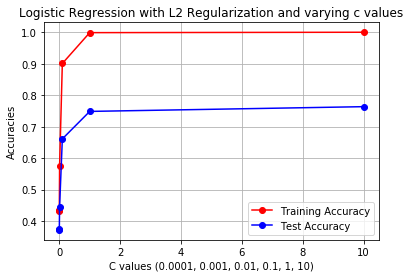

In [27]:
plt.plot(c_vals, train_acc_carray, 'ro-') 
plt.plot(c_vals, test_acc_carray,'bo-') 
plt.grid()
plt.xlabel('C values (0.0001, 0.001, 0.01, 0.1, 1, 10)')
plt.ylabel('Accuracies')
plt.title('Logistic Regression with L2 Regularization and varying c values')

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='best')